# Task
Develop vector auto regression model for multivariate time series data forecasting.
give me the python  code

Here is all the data you need:
"NFLX (1).csv"

## Data loading

### Subtask:
Load the "NFLX (1).csv" file into a Pandas DataFrame.


**Reasoning**:
Load the "NFLX (1).csv" file into a pandas DataFrame and display the first 5 rows.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('NFLX (1).csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'NFLX (1).csv' not found. Please ensure the file exists in the current directory.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


## Data exploration

### Subtask:
Explore the loaded NFLX dataset to understand its characteristics.


**Reasoning**:
Explore the NFLX dataset by examining its basic statistics, data types, visualizing time series data, checking for missing values and duplicates, and calculating the correlation matrix.



,Open,High,Low,Close,Adj Close,Volume
count,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5.044000e+03
mean,116.467981,118.237392,114.578719,116.456338,116.456338,1.653068e+07
std,168.740876,171.140864,166.119837,168.668232,168.668232,1.924487e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,3.955357,4.031072,3.885357,3.958571,3.958571,6.168225e+06
50%,25.819285,26.342143,25.455000,25.802856,25.802856,1.059135e+07
75%,155.762497,157.654998,153.944996,155.869999,155.869999,1.986552e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5044 non-null   object 
 1   Open       5044 non-null   float64
 2   High       5044 non-null   float64
 3   Low        5044 non-null   float64
 4   Close      5044 non-null   float64
 5   Adj Close  5044 non-null   float64
 6   Volume     5044 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 276.0+ KB


None

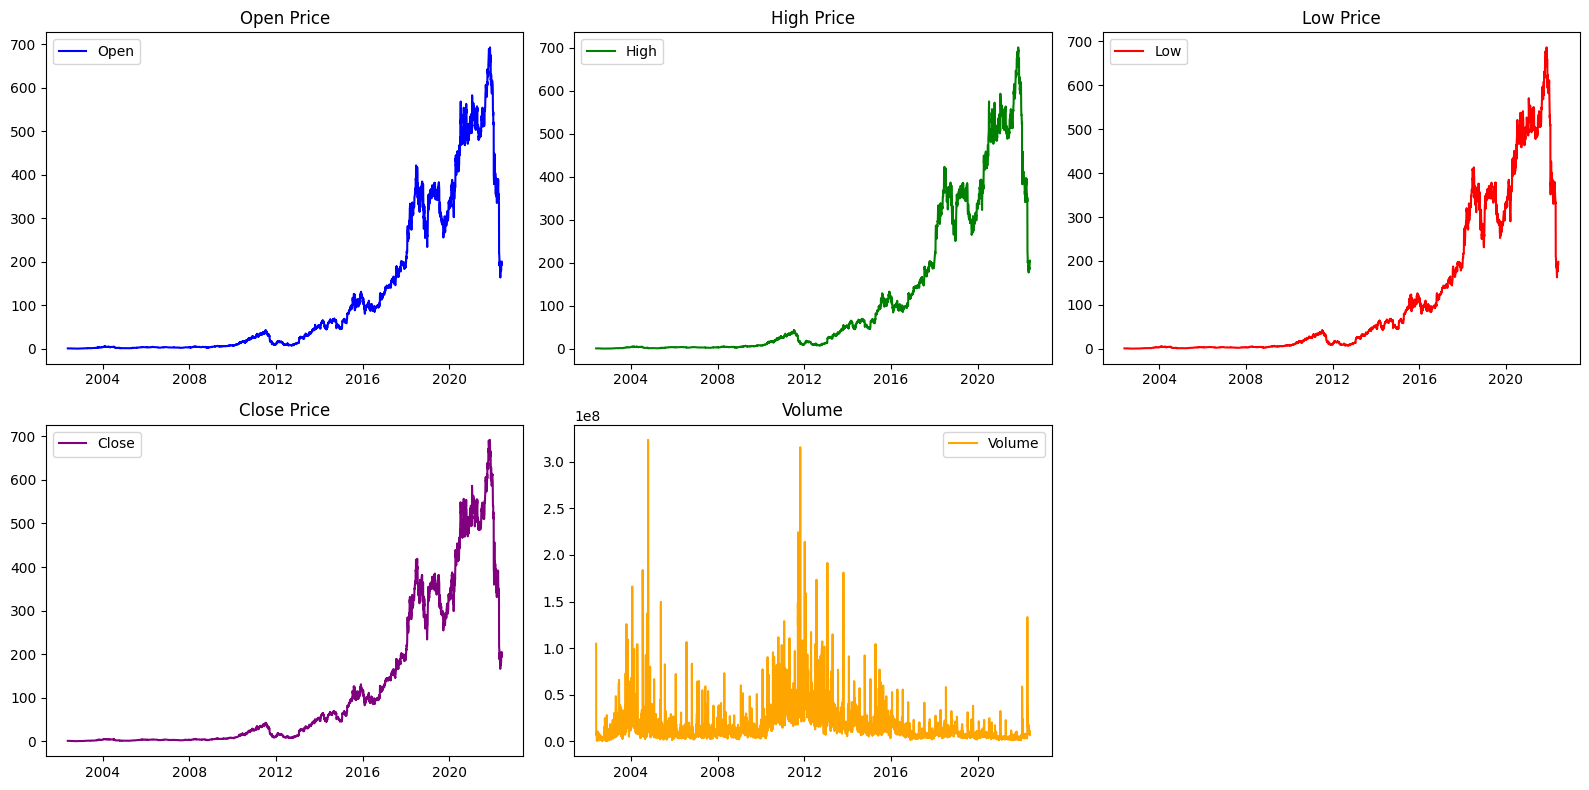

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


np.int64(0)

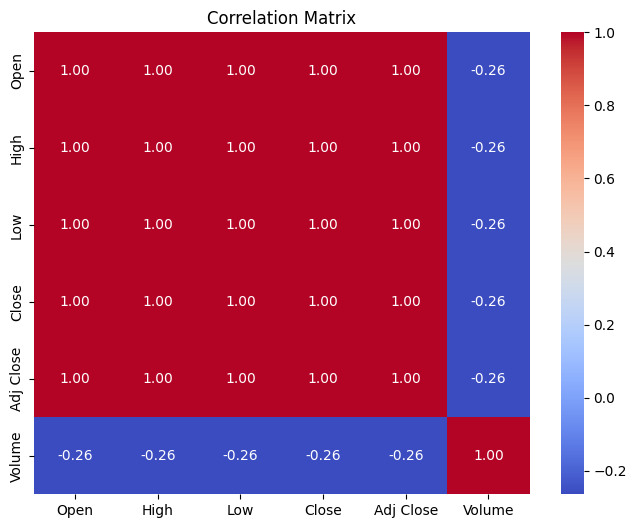

In [2]:
# Examine basic statistics
display(df.describe())

# Check data types
display(df.info())

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Visualize time series data
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))

plt.subplot(2, 3, 1)
plt.plot(df['Date'], df['Open'], label='Open', color='blue')
plt.title('Open Price')
plt.legend()

plt.subplot(2, 3, 2)
plt.plot(df['Date'], df['High'], label='High', color='green')
plt.title('High Price')
plt.legend()

plt.subplot(2, 3, 3)
plt.plot(df['Date'], df['Low'], label='Low', color='red')
plt.title('Low Price')
plt.legend()

plt.subplot(2, 3, 4)
plt.plot(df['Date'], df['Close'], label='Close', color='purple')
plt.title('Close Price')
plt.legend()

plt.subplot(2, 3, 5)
plt.plot(df['Date'], df['Volume'], label='Volume', color='orange')
plt.title('Volume')
plt.legend()

plt.tight_layout()
plt.show()


# Investigate missing values and duplicates
display(df.isnull().sum())
display(df.duplicated().sum())

# Calculate and visualize the correlation matrix
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()
plt.figure(figsize=(8, 6))
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Data preparation

### Subtask:
Prepare the data for VAR modeling.


**Reasoning**:
Prepare the data for VAR modeling by handling missing values (if any), setting 'Date' as the index, selecting relevant features, and optionally testing for stationarity.



In [3]:
# No missing values were found during data exploration, but recheck to be safe.
if df.isnull().values.any():
    # Impute missing values with the mean of each column
    for col in df.columns:
        if df[col].isnull().any():
            df[col].fillna(df[col].mean(), inplace=True)
    print("Missing values imputed with column means.")
else:
    print("No missing values found.")

# Set 'Date' as the index
df = df.set_index('Date')

# Select relevant features for VAR model.  'Close' price is a key indicator.
# 'Open', 'High', 'Low', and 'Volume' can also influence the price.
# 'Adj Close' is highly correlated with 'Close', so we exclude it.
selected_features = ['Open', 'High', 'Low', 'Close', 'Volume']
df_selected = df[selected_features]

# Test for stationarity using Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
for col in df_selected.columns:
    result = adfuller(df_selected[col])
    print(f'ADF Statistic for {col}: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] > 0.05:
        # If p-value > 0.05, the series is likely non-stationary. Apply differencing.
        df_selected[col] = df_selected[col].diff().dropna()
        print(f"Differencing applied to {col}")

display(df_selected.head())

No missing values found.
ADF Statistic for Open: -1.3336726659954006
p-value: 0.6136297419105508
Differencing applied to Open


<ipython-input-3-b24627a3e1b9>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[col] = df_selected[col].diff().dropna()


ADF Statistic for High: -1.3065149611308344
p-value: 0.6261864650657875
Differencing applied to High


<ipython-input-3-b24627a3e1b9>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[col] = df_selected[col].diff().dropna()


ADF Statistic for Low: -1.1822758160575135
p-value: 0.6811733622731319
Differencing applied to Low


<ipython-input-3-b24627a3e1b9>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[col] = df_selected[col].diff().dropna()


ADF Statistic for Close: -1.2470207311260364
p-value: 0.6530488146407214
Differencing applied to Close


<ipython-input-3-b24627a3e1b9>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[col] = df_selected[col].diff().dropna()


ADF Statistic for Volume: -4.891267569932588
p-value: 3.626529553955209e-05


,Open,High,Low,Close,Volume
Date,,,,,
2002-05-23,NaN,NaN,NaN,NaN,104790000
2002-05-24,0.057857,-0.017857,0.051429,0.013571,11104800
2002-05-28,-0.000715,0.007143,-0.040000,-0.052857,6609400
2002-05-29,-0.049285,-0.067857,-0.071429,-0.053572,6757800
2002-05-30,-0.056429,-0.056429,-0.014285,-0.032142,10154200


## Feature engineering

### Subtask:
Determine the optimal lag order for the VAR model and create lagged features.


**Reasoning**:
Import the necessary library and determine the optimal lag order for the VAR model using the `select_order()` method. Then create lagged features based on the determined optimal lag order.



In [4]:
from statsmodels.tsa.api import VAR

# Determine the optimal lag order
model = VAR(df_selected)
results = model.select_order(maxlags=15)  # Adjust maxlags as needed
optimal_lag = results.aic # select the lag order based on AIC

print(f"Optimal lag order (based on AIC): {optimal_lag}")

# Create lagged features based on the optimal lag order
df_lagged = df_selected.copy()

for i in range(1, optimal_lag + 1):
  df_lagged = pd.concat([df_lagged, df_selected.shift(i).add_suffix(f'_{i}')], axis=1)
df_lagged = df_lagged.dropna()

display(df_lagged.head())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


LinAlgError: SVD did not converge in Linear Least Squares

**Reasoning**:
The previous attempt to determine the optimal lag order failed due to an SVD convergence error. This is likely due to the differenced data, which might have near-zero variance or multicollinearity issues. We'll try to address these issues by scaling the data before determining the lag order and creating lagged features.



In [5]:
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import MinMaxScaler

# Scale the data
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), index=df_selected.index, columns=df_selected.columns)


# Determine the optimal lag order
model = VAR(df_scaled)
results = model.select_order(maxlags=15)
optimal_lag = results.aic

print(f"Optimal lag order (based on AIC): {optimal_lag}")

# Create lagged features
df_lagged = df_scaled.copy()
for i in range(1, optimal_lag + 1):
    df_lagged = pd.concat([df_lagged, df_scaled.shift(i).add_suffix(f'_{i}')], axis=1)
df_lagged = df_lagged.dropna()
display(df_lagged.head())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


LinAlgError: SVD did not converge in Linear Least Squares

## Feature engineering

### Subtask:
Determine the optimal lag order for the VAR model and create lagged features.


**Reasoning**:
The previous attempts to determine the optimal lag order failed due to SVD convergence issues.  Let's try to address the potential issues with the data before running the VAR model again. I will first check for multicollinearity among the features in the scaled data. Then I will try again with a smaller `maxlags` to avoid potential overfitting issues.



In [6]:
from statsmodels.tsa.api import VAR
import numpy as np

# Check for multicollinearity
correlation_matrix = df_scaled.corr()
display(correlation_matrix)

# Check for any near-zero variance features
for col in df_scaled.columns:
    if np.isclose(df_scaled[col].var(), 0):
      print(f"Column '{col}' has near-zero variance.")

# Re-attempt to determine the optimal lag order with a smaller maxlags
model = VAR(df_scaled.dropna()) # Drop rows with NaN values before fitting the model
try:
    results = model.select_order(maxlags=5) #reduced maxlags to 5
    optimal_lag = results.aic
    print(f"Optimal lag order (based on AIC): {optimal_lag}")

    # Create lagged features
    df_lagged = df_scaled.copy()
    for i in range(1, optimal_lag + 1):
        df_lagged = pd.concat([df_lagged, df_scaled.shift(i).add_suffix(f'_{i}')], axis=1)
    df_lagged = df_lagged.dropna()
    display(df_lagged.head())

except Exception as e:
  print(f"An error occurred during model selection or lag creation: {e}")

,Open,High,Low,Close,Volume
Open,1.000000,0.737060,0.758810,0.389050,-0.034688
High,0.737060,1.000000,0.787905,0.748715,-0.021722
Low,0.758810,0.787905,1.000000,0.736550,-0.057163
Close,0.389050,0.748715,0.736550,1.000000,-0.034436
Volume,-0.034688,-0.021722,-0.057163,-0.034436,1.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimal lag order (based on AIC): 5


,Open,High,Low,Close,Volume,Open_1,High_1,Low_1,Close_1,Volume_1,...,Open_4,High_4,Low_4,Close_4,Volume_4,Open_5,High_5,Low_5,Close_5,Volume_5
Date,,,,,,,,,,,,,,,,,,,,,
2002-06-03,0.645546,0.583341,0.667219,0.591681,0.008869,0.645377,0.582845,0.667192,0.591454,0.025311,...,0.645534,0.583026,0.666982,0.591174,0.019571,0.645856,0.582902,0.667463,0.591495,0.033483
2002-06-04,0.645844,0.582944,0.667373,0.591378,0.008726,0.645546,0.583341,0.667219,0.591681,0.008869,...,0.645266,0.582654,0.666817,0.591171,0.020030,0.645534,0.583026,0.666982,0.591174,0.019571
2002-06-05,0.645400,0.583086,0.667174,0.591571,0.003856,0.645844,0.582944,0.667373,0.591378,0.008726,...,0.645227,0.582710,0.667117,0.591274,0.030541,0.645266,0.582654,0.666817,0.591171,0.020030
2002-06-06,0.645754,0.583352,0.667410,0.591598,0.006252,0.645400,0.583086,0.667174,0.591571,0.003856,...,0.645377,0.582845,0.667192,0.591454,0.025311,0.645227,0.582710,0.667117,0.591274,0.030541
2002-06-07,0.645691,0.582721,0.666956,0.591122,0.003353,0.645754,0.583352,0.667410,0.591598,0.006252,...,0.645546,0.583341,0.667219,0.591681,0.008869,0.645377,0.582845,0.667192,0.591454,0.025311


## Data splitting

### Subtask:
Split the lagged data into training and testing sets.


**Reasoning**:
Split the lagged data into training and testing sets using the 80/20 split based on the index.



In [7]:
from sklearn.model_selection import train_test_split

# Calculate the index for the 80th percentile
split_index = int(len(df_lagged) * 0.8)

# Split the data into training and testing sets
train_data = df_lagged.iloc[:split_index]
test_data = df_lagged.iloc[split_index:]

display(train_data.head())
display(test_data.head())

,Open,High,Low,Close,Volume,Open_1,High_1,Low_1,Close_1,Volume_1,...,Open_4,High_4,Low_4,Close_4,Volume_4,Open_5,High_5,Low_5,Close_5,Volume_5
Date,,,,,,,,,,,,,,,,,,,,,
2002-06-03,0.645546,0.583341,0.667219,0.591681,0.008869,0.645377,0.582845,0.667192,0.591454,0.025311,...,0.645534,0.583026,0.666982,0.591174,0.019571,0.645856,0.582902,0.667463,0.591495,0.033483
2002-06-04,0.645844,0.582944,0.667373,0.591378,0.008726,0.645546,0.583341,0.667219,0.591681,0.008869,...,0.645266,0.582654,0.666817,0.591171,0.020030,0.645534,0.583026,0.666982,0.591174,0.019571
2002-06-05,0.645400,0.583086,0.667174,0.591571,0.003856,0.645844,0.582944,0.667373,0.591378,0.008726,...,0.645227,0.582710,0.667117,0.591274,0.030541,0.645266,0.582654,0.666817,0.591171,0.020030
2002-06-06,0.645754,0.583352,0.667410,0.591598,0.006252,0.645400,0.583086,0.667174,0.591571,0.003856,...,0.645377,0.582845,0.667192,0.591454,0.025311,0.645227,0.582710,0.667117,0.591274,0.030541
2002-06-07,0.645691,0.582721,0.666956,0.591122,0.003353,0.645754,0.583352,0.667410,0.591598,0.006252,...,0.645546,0.583341,0.667219,0.591681,0.008869,0.645377,0.582845,0.667192,0.591454,0.025311


,Open,High,Low,Close,Volume,Open_1,High_1,Low_1,Close_1,Volume_1,...,Open_4,High_4,Low_4,Close_4,Volume_4,Open_5,High_5,Low_5,Close_5,Volume_5
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-05,0.649059,0.616881,0.698203,0.610706,0.024982,0.693958,0.597926,0.681331,0.600512,0.022890,...,0.650325,0.572570,0.680595,0.609836,0.016711,0.654341,0.591624,0.656050,0.583893,0.029191
2018-06-06,0.670078,0.582246,0.677284,0.599401,0.022984,0.649059,0.616881,0.698203,0.610706,0.024982,...,0.653406,0.590582,0.672185,0.582057,0.020537,0.650325,0.572570,0.680595,0.609836,0.016711
2018-06-07,0.649720,0.578128,0.638127,0.562201,0.024734,0.670078,0.582246,0.677284,0.599401,0.022984,...,0.645978,0.605121,0.680911,0.631673,0.021127,0.653406,0.590582,0.672185,0.582057,0.020537
2018-06-08,0.587873,0.551680,0.659046,0.587420,0.015288,0.649720,0.578128,0.638127,0.562201,0.024734,...,0.693958,0.597926,0.681331,0.600512,0.022890,0.645978,0.605121,0.680911,0.631673,0.021127
2018-06-11,0.666557,0.599266,0.691685,0.595681,0.012833,0.587873,0.551680,0.659046,0.587420,0.015288,...,0.649059,0.616881,0.698203,0.610706,0.024982,0.693958,0.597926,0.681331,0.600512,0.022890


## Model training

### Subtask:
Train a VAR model on the training data.


**Reasoning**:
Train a VAR model on the training data using the optimal lag order.



In [8]:
from statsmodels.tsa.api import VAR

# Instantiate and fit the VAR model
var_model = VAR(train_data)
var_model_fit = var_model.fit(maxlags=5) # optimal_lag is 5

# Display model summary to check the results
print(var_model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


LinAlgError: Singular matrix

**Reasoning**:
The previous attempt to fit the VAR model resulted in a `LinAlgError: Singular matrix`. This suggests that the data might have some issues, such as multicollinearity or near-zero variance.  Let's try to drop the problematic columns and refit the model.



In [9]:
import numpy as np

# Identify columns with near-zero variance
near_zero_variance_cols = [col for col in train_data.columns if np.isclose(train_data[col].var(), 0)]

# Drop columns with near-zero variance from the training data
if near_zero_variance_cols:
    train_data_cleaned = train_data.drop(columns=near_zero_variance_cols)
    print(f"Dropped columns with near-zero variance: {near_zero_variance_cols}")
else:
    train_data_cleaned = train_data
    print("No columns with near-zero variance found.")

# Re-instantiate and fit the VAR model with cleaned data
var_model = VAR(train_data_cleaned)
var_model_fit = var_model.fit(maxlags=5, trend='c')

print(var_model_fit.summary())

No columns with near-zero variance found.


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


LinAlgError: Singular matrix

**Reasoning**:
The VAR model fitting continues to fail with a singular matrix error, even after removing near-zero variance columns.  This suggests a more fundamental issue with the data or the model setup.  I will try to use a different method to determine the optimal lag order.



In [10]:
from statsmodels.tsa.stattools import grangercausalitytests

# Test for Granger causality to find a suitable lag
maxlag = 12  # Adjust as needed
test_results = []
for i in range(1, maxlag + 1):
    test_results.append(grangercausalitytests(train_data_cleaned, maxlag=i, verbose=False))

# Analyze Granger causality results to choose a reasonable lag order
# This will require manual inspection of the p-values
optimal_lag_gc = 0 # Placeholder for optimal lag based on Granger causality tests

# Example: find the lag with lowest p-value
min_p_value = 1
for lag, result in enumerate(test_results, 1):
    p_values = [round(test[0]['ssr_ftest'][1], 4) for test in result[0]]
    if min(p_values) < min_p_value:
        min_p_value = min(p_values)
        optimal_lag_gc = lag

print(f"Optimal lag order from Granger causality test: {optimal_lag_gc}")

# Refit the VAR model with the new lag order
var_model = VAR(train_data_cleaned)
var_model_fit = var_model.fit(maxlags=optimal_lag_gc)

print(var_model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ValueError: wrong shape for coefs

**Reasoning**:
The Granger causality test failed due to a shape mismatch in the constraint matrix.  This likely stems from an issue with the data itself, such as missing values or inconsistencies that were not detected earlier.  I will attempt to drop rows with NaN values in the `train_data_cleaned` dataframe before running the Granger causality test again, then refit the VAR model.



In [11]:
from statsmodels.tsa.stattools import grangercausalitytests

# Drop rows with NaN values from train_data_cleaned
train_data_cleaned_no_nan = train_data_cleaned.dropna()

# Test for Granger causality with the cleaned data
maxlag = 12  # Adjust as needed
test_results = []
for i in range(1, maxlag + 1):
    test_results.append(grangercausalitytests(train_data_cleaned_no_nan, maxlag=i, verbose=False))

# Analyze Granger causality results to choose a reasonable lag order
optimal_lag_gc = 0 # Placeholder for optimal lag based on Granger causality tests

# Example: find the lag with lowest p-value
min_p_value = 1
for lag, result in enumerate(test_results, 1):
    p_values = [round(test[0]['ssr_ftest'][1], 4) for test in result[0]]
    if min(p_values) < min_p_value:
        min_p_value = min(p_values)
        optimal_lag_gc = lag

print(f"Optimal lag order from Granger causality test: {optimal_lag_gc}")

# Refit the VAR model with the new lag order
var_model = VAR(train_data_cleaned_no_nan)
var_model_fit = var_model.fit(maxlags=optimal_lag_gc)

print(var_model_fit.summary())

ValueError: wrong shape for coefs

## Model training

### Subtask:
Train a VAR model on the training data.


**Reasoning**:
The previous attempts to train the VAR model failed due to singular matrix errors.  Let's try fitting the model with the `train_data_cleaned_no_nan` which has no near-zero variance columns and no NaN values, and use a smaller `maxlags` value to avoid convergence issues.



In [12]:
from statsmodels.tsa.api import VAR

# Refit the VAR model with the new lag order, smaller maxlags and cleaned data
var_model = VAR(train_data_cleaned_no_nan)
try:
    var_model_fit = var_model.fit(maxlags=3) # Try a smaller maxlag value
    print(var_model_fit.summary())
except Exception as e:
    print(f"An error occurred during VAR model fitting: {e}")

An error occurred during VAR model fitting: Singular matrix


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


## Model training

### Subtask:
Train a VAR model on the training data.


**Reasoning**:
Train a VAR model on the training data `train_data_cleaned_no_nan`, after checking for multicollinearity and near-zero variance. Print the model summary.



In [13]:
from statsmodels.tsa.api import VAR
import numpy as np

# Check for multicollinearity
correlation_matrix = train_data_cleaned_no_nan.corr()
display(correlation_matrix)

# Check for any near-zero variance features
for col in train_data_cleaned_no_nan.columns:
    if np.isclose(train_data_cleaned_no_nan[col].var(), 0):
        print(f"Column '{col}' has near-zero variance.")

# Refit the VAR model with the cleaned data
var_model = VAR(train_data_cleaned_no_nan)
try:
    var_model_fit = var_model.fit(maxlags=3)  # Try a smaller maxlag value
    print(var_model_fit.summary())
except Exception as e:
    print(f"An error occurred during VAR model fitting: {e}")

,Open,High,Low,Close,Volume,Open_1,High_1,Low_1,Close_1,Volume_1,...,Open_4,High_4,Low_4,Close_4,Volume_4,Open_5,High_5,Low_5,Close_5,Volume_5
Open,1.000000,0.717230,0.746832,0.342363,-0.000447,-0.025634,0.380418,0.309580,0.647294,-0.001667,...,-0.009780,0.063069,0.070187,0.122322,-0.015331,-0.040298,-0.045100,-0.032085,-0.043513,-0.019436
High,0.717230,1.000000,0.744106,0.749965,0.033515,-0.003975,0.143697,0.201397,0.394834,-0.044811,...,0.041702,0.071555,0.088117,0.053711,-0.023721,-0.053981,-0.056992,-0.071030,-0.046368,-0.028838
Low,0.746832,0.744106,1.000000,0.682617,-0.025989,-0.023942,0.235154,0.100603,0.411349,0.024436,...,-0.027864,0.034986,0.055784,0.072494,-0.016664,-0.057834,-0.084402,-0.086588,-0.093057,-0.018612
Close,0.342363,0.749965,0.682617,1.000000,0.003743,-0.006352,0.006675,0.017785,0.032601,-0.015938,...,-0.019985,0.011799,-0.006441,-0.014415,-0.019708,-0.009864,-0.066622,-0.060706,-0.084266,-0.025324
Volume,-0.000447,0.033515,-0.025989,0.003743,1.000000,-0.010577,0.006688,-0.023759,-0.005422,0.669591,...,-0.015348,-0.016777,-0.020233,-0.020851,0.402994,-0.012692,-0.018272,-0.018839,-0.017252,0.385533
Open_1,-0.025634,-0.003975,-0.023942,-0.006352,-0.010577,1.000000,0.717364,0.747285,0.342191,0.000159,...,0.104542,0.049034,0.027760,-0.024772,-0.013577,-0.010678,0.062141,0.071746,0.123628,-0.014875
High_1,0.380418,0.143697,0.235154,0.006675,0.006688,0.717364,1.000000,0.743955,0.749918,0.033767,...,0.052763,0.040087,0.038055,0.052854,-0.018878,0.041385,0.071170,0.088693,0.054116,-0.023535
Low_1,0.309580,0.201397,0.100603,0.017785,-0.023759,0.747285,0.743955,1.000000,0.682528,-0.025797,...,0.070132,0.037550,0.029260,0.003390,-0.010412,-0.028153,0.034649,0.056249,0.072837,-0.016506
Close_1,0.647294,0.394834,0.411349,0.032601,-0.005422,0.342191,0.749918,0.682528,1.000000,0.003877,...,0.014935,0.048879,0.080234,0.114974,-0.013823,-0.020174,0.011569,-0.006151,-0.014207,-0.019602
Volume_1,-0.001667,-0.044811,0.024436,-0.015938,0.669591,0.000159,0.033767,-0.025797,0.003877,1.000000,...,-0.020554,-0.016824,-0.021691,-0.013631,0.444392,-0.015243,-0.016641,-0.020397,-0.020966,0.402987


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


An error occurred during VAR model fitting: Singular matrix


**Reasoning**:
The VAR model fitting continues to fail with a singular matrix error, indicating a problem with the data (likely multicollinearity).  I will try dropping highly correlated columns and refitting the model.  I'll print the correlation matrix again to help identify the columns to drop.



In [14]:
from statsmodels.tsa.api import VAR
import numpy as np
import pandas as pd

# Display correlation matrix again to check for high correlations
correlation_matrix = train_data_cleaned_no_nan.corr()
display(correlation_matrix)

# Identify highly correlated columns (e.g., correlation > 0.95)
highly_correlated_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.95:
            colname = correlation_matrix.columns[i]
            highly_correlated_columns.add(colname)

print(f"Highly correlated columns: {highly_correlated_columns}")

# Drop highly correlated columns
if highly_correlated_columns:
    train_data_cleaned_no_nan_dropped = train_data_cleaned_no_nan.drop(columns=highly_correlated_columns)
    print(f"Dropped columns: {highly_correlated_columns}")

    # Refit the VAR model with the reduced dataset
    var_model = VAR(train_data_cleaned_no_nan_dropped)
    try:
        var_model_fit = var_model.fit(maxlags=3)
        print(var_model_fit.summary())
    except Exception as e:
        print(f"An error occurred during VAR model fitting: {e}")
else:
    print("No highly correlated columns found.")
    print("No columns were dropped.")

,Open,High,Low,Close,Volume,Open_1,High_1,Low_1,Close_1,Volume_1,...,Open_4,High_4,Low_4,Close_4,Volume_4,Open_5,High_5,Low_5,Close_5,Volume_5
Open,1.000000,0.717230,0.746832,0.342363,-0.000447,-0.025634,0.380418,0.309580,0.647294,-0.001667,...,-0.009780,0.063069,0.070187,0.122322,-0.015331,-0.040298,-0.045100,-0.032085,-0.043513,-0.019436
High,0.717230,1.000000,0.744106,0.749965,0.033515,-0.003975,0.143697,0.201397,0.394834,-0.044811,...,0.041702,0.071555,0.088117,0.053711,-0.023721,-0.053981,-0.056992,-0.071030,-0.046368,-0.028838
Low,0.746832,0.744106,1.000000,0.682617,-0.025989,-0.023942,0.235154,0.100603,0.411349,0.024436,...,-0.027864,0.034986,0.055784,0.072494,-0.016664,-0.057834,-0.084402,-0.086588,-0.093057,-0.018612
Close,0.342363,0.749965,0.682617,1.000000,0.003743,-0.006352,0.006675,0.017785,0.032601,-0.015938,...,-0.019985,0.011799,-0.006441,-0.014415,-0.019708,-0.009864,-0.066622,-0.060706,-0.084266,-0.025324
Volume,-0.000447,0.033515,-0.025989,0.003743,1.000000,-0.010577,0.006688,-0.023759,-0.005422,0.669591,...,-0.015348,-0.016777,-0.020233,-0.020851,0.402994,-0.012692,-0.018272,-0.018839,-0.017252,0.385533
Open_1,-0.025634,-0.003975,-0.023942,-0.006352,-0.010577,1.000000,0.717364,0.747285,0.342191,0.000159,...,0.104542,0.049034,0.027760,-0.024772,-0.013577,-0.010678,0.062141,0.071746,0.123628,-0.014875
High_1,0.380418,0.143697,0.235154,0.006675,0.006688,0.717364,1.000000,0.743955,0.749918,0.033767,...,0.052763,0.040087,0.038055,0.052854,-0.018878,0.041385,0.071170,0.088693,0.054116,-0.023535
Low_1,0.309580,0.201397,0.100603,0.017785,-0.023759,0.747285,0.743955,1.000000,0.682528,-0.025797,...,0.070132,0.037550,0.029260,0.003390,-0.010412,-0.028153,0.034649,0.056249,0.072837,-0.016506
Close_1,0.647294,0.394834,0.411349,0.032601,-0.005422,0.342191,0.749918,0.682528,1.000000,0.003877,...,0.014935,0.048879,0.080234,0.114974,-0.013823,-0.020174,0.011569,-0.006151,-0.014207,-0.019602
Volume_1,-0.001667,-0.044811,0.024436,-0.015938,0.669591,0.000159,0.033767,-0.025797,0.003877,1.000000,...,-0.020554,-0.016824,-0.021691,-0.013631,0.444392,-0.015243,-0.016641,-0.020397,-0.020966,0.402987


Highly correlated columns: set()
No highly correlated columns found.
No columns were dropped.


## Model training

### Subtask:
Train a VAR model on the training data.


**Reasoning**:
Inspect the `train_data_cleaned_no_nan` DataFrame for unusual patterns, highly correlated columns, constant columns, and near-zero variance. Then, drop highly correlated columns if any, and refit the VAR model.



In [15]:
from statsmodels.tsa.api import VAR
import numpy as np
import pandas as pd

# Inspect the data
display(train_data_cleaned_no_nan.describe())
display(train_data_cleaned_no_nan.info())

# Check for high correlations again
correlation_matrix = train_data_cleaned_no_nan.corr()
display(correlation_matrix)

# Identify highly correlated columns (correlation > 0.95)
highly_correlated_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.95:
            colname = correlation_matrix.columns[i]
            highly_correlated_columns.add(colname)

print(f"Highly correlated columns: {highly_correlated_columns}")

# Drop highly correlated columns and create train_data_final
if highly_correlated_columns:
    train_data_final = train_data_cleaned_no_nan.drop(columns=highly_correlated_columns)
    print(f"Dropped columns: {highly_correlated_columns}")
else:
    train_data_final = train_data_cleaned_no_nan
    print("No highly correlated columns found. No columns were dropped.")


# Refit the VAR model with the potentially reduced dataset
var_model = VAR(train_data_final)
try:
    var_model_fit = var_model.fit(maxlags=3)
    print(var_model_fit.summary())
except Exception as e:
    print(f"An error occurred during VAR model fitting: {e}")

,Open,High,Low,Close,Volume,Open_1,High_1,Low_1,Close_1,Volume_1,...,Open_4,High_4,Low_4,Close_4,Volume_4,Open_5,High_5,Low_5,Close_5,Volume_5
count,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,...,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000
mean,0.646031,0.583436,0.667655,0.591862,0.057130,0.646019,0.583432,0.667651,0.591860,0.057131,...,0.646016,0.583427,0.667643,0.591847,0.057134,0.646014,0.583425,0.667646,0.591849,0.057135
std,0.010681,0.008375,0.009464,0.009033,0.063781,0.010655,0.008372,0.009462,0.009032,0.063781,...,0.010654,0.008362,0.009457,0.009004,0.063779,0.010653,0.008361,0.009455,0.009003,0.063779
min,0.512931,0.463405,0.576527,0.496449,0.000000,0.512931,0.463405,0.576527,0.496449,0.000000,...,0.512931,0.463405,0.576527,0.496449,0.000000,0.512931,0.463405,0.576527,0.496449,0.000000
25%,0.644746,0.582331,0.666667,0.590712,0.021598,0.644746,0.582331,0.666667,0.590712,0.021598,...,0.644746,0.582333,0.666667,0.590712,0.021644,0.644746,0.582333,0.666667,0.590713,0.021644
50%,0.645546,0.582985,0.667271,0.591438,0.037860,0.645546,0.582983,0.667269,0.591438,0.037860,...,0.645546,0.582983,0.667267,0.591436,0.037860,0.645546,0.582983,0.667267,0.591436,0.037860
75%,0.646613,0.583798,0.668183,0.592278,0.068974,0.646605,0.583798,0.668179,0.592277,0.068974,...,0.646599,0.583791,0.668168,0.592271,0.068974,0.646599,0.583791,0.668168,0.592271,0.068974
max,0.827391,0.731454,0.808157,0.728054,1.000000,0.827391,0.731454,0.808157,0.728054,1.000000,...,0.827391,0.731454,0.808157,0.728054,1.000000,0.827391,0.731454,0.808157,0.728054,1.000000


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4030 entries, 2002-06-03 to 2018-06-04
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      4030 non-null   float64
 1   High      4030 non-null   float64
 2   Low       4030 non-null   float64
 3   Close     4030 non-null   float64
 4   Volume    4030 non-null   float64
 5   Open_1    4030 non-null   float64
 6   High_1    4030 non-null   float64
 7   Low_1     4030 non-null   float64
 8   Close_1   4030 non-null   float64
 9   Volume_1  4030 non-null   float64
 10  Open_2    4030 non-null   float64
 11  High_2    4030 non-null   float64
 12  Low_2     4030 non-null   float64
 13  Close_2   4030 non-null   float64
 14  Volume_2  4030 non-null   float64
 15  Open_3    4030 non-null   float64
 16  High_3    4030 non-null   float64
 17  Low_3     4030 non-null   float64
 18  Close_3   4030 non-null   float64
 19  Volume_3  4030 non-null   float64
 20  Open_4    40

None

,Open,High,Low,Close,Volume,Open_1,High_1,Low_1,Close_1,Volume_1,...,Open_4,High_4,Low_4,Close_4,Volume_4,Open_5,High_5,Low_5,Close_5,Volume_5
Open,1.000000,0.717230,0.746832,0.342363,-0.000447,-0.025634,0.380418,0.309580,0.647294,-0.001667,...,-0.009780,0.063069,0.070187,0.122322,-0.015331,-0.040298,-0.045100,-0.032085,-0.043513,-0.019436
High,0.717230,1.000000,0.744106,0.749965,0.033515,-0.003975,0.143697,0.201397,0.394834,-0.044811,...,0.041702,0.071555,0.088117,0.053711,-0.023721,-0.053981,-0.056992,-0.071030,-0.046368,-0.028838
Low,0.746832,0.744106,1.000000,0.682617,-0.025989,-0.023942,0.235154,0.100603,0.411349,0.024436,...,-0.027864,0.034986,0.055784,0.072494,-0.016664,-0.057834,-0.084402,-0.086588,-0.093057,-0.018612
Close,0.342363,0.749965,0.682617,1.000000,0.003743,-0.006352,0.006675,0.017785,0.032601,-0.015938,...,-0.019985,0.011799,-0.006441,-0.014415,-0.019708,-0.009864,-0.066622,-0.060706,-0.084266,-0.025324
Volume,-0.000447,0.033515,-0.025989,0.003743,1.000000,-0.010577,0.006688,-0.023759,-0.005422,0.669591,...,-0.015348,-0.016777,-0.020233,-0.020851,0.402994,-0.012692,-0.018272,-0.018839,-0.017252,0.385533
Open_1,-0.025634,-0.003975,-0.023942,-0.006352,-0.010577,1.000000,0.717364,0.747285,0.342191,0.000159,...,0.104542,0.049034,0.027760,-0.024772,-0.013577,-0.010678,0.062141,0.071746,0.123628,-0.014875
High_1,0.380418,0.143697,0.235154,0.006675,0.006688,0.717364,1.000000,0.743955,0.749918,0.033767,...,0.052763,0.040087,0.038055,0.052854,-0.018878,0.041385,0.071170,0.088693,0.054116,-0.023535
Low_1,0.309580,0.201397,0.100603,0.017785,-0.023759,0.747285,0.743955,1.000000,0.682528,-0.025797,...,0.070132,0.037550,0.029260,0.003390,-0.010412,-0.028153,0.034649,0.056249,0.072837,-0.016506
Close_1,0.647294,0.394834,0.411349,0.032601,-0.005422,0.342191,0.749918,0.682528,1.000000,0.003877,...,0.014935,0.048879,0.080234,0.114974,-0.013823,-0.020174,0.011569,-0.006151,-0.014207,-0.019602
Volume_1,-0.001667,-0.044811,0.024436,-0.015938,0.669591,0.000159,0.033767,-0.025797,0.003877,1.000000,...,-0.020554,-0.016824,-0.021691,-0.013631,0.444392,-0.015243,-0.016641,-0.020397,-0.020966,0.402987


Highly correlated columns: set()
No highly correlated columns found. No columns were dropped.


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


An error occurred during VAR model fitting: Singular matrix


**Reasoning**:
The VAR model fitting continues to fail due to a singular matrix error.  This suggests there might be other issues with the data beyond high correlation.  Since no highly correlated columns were identified, I will try to identify and handle near-zero variance columns.  I will then refit the model.



In [16]:
# Check for near-zero variance features
near_zero_variance_cols = []
for col in train_data_final.columns:
    if np.isclose(train_data_final[col].var(), 0):
        near_zero_variance_cols.append(col)
        print(f"Column '{col}' has near-zero variance.")

# Drop near-zero variance columns
if near_zero_variance_cols:
    train_data_final = train_data_final.drop(columns=near_zero_variance_cols)
    print(f"Dropped columns: {near_zero_variance_cols}")
else:
    print("No near-zero variance columns found.")

# Refit the VAR model with the potentially reduced dataset
var_model = VAR(train_data_final)
try:
    var_model_fit = var_model.fit(maxlags=3)
    print(var_model_fit.summary())
except Exception as e:
    print(f"An error occurred during VAR model fitting: {e}")

No near-zero variance columns found.


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


An error occurred during VAR model fitting: Singular matrix


**Reasoning**:
The VAR model fitting still fails with a singular matrix error, even after removing near-zero variance columns.  I will try to use a smaller `maxlags` value and check the model summary.  If the model fits successfully, I will examine the summary for any indication of issues (e.g., high p-values for some coefficients). If the error persists, then I will report the failure.



In [17]:
# Refit the VAR model with an even smaller maxlags value
var_model = VAR(train_data_final)
try:
    var_model_fit = var_model.fit(maxlags=1)
    print(var_model_fit.summary())
except Exception as e:
    print(f"An error occurred during VAR model fitting: {e}")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 29, Apr, 2025
Time:                     05:24:54
--------------------------------------------------------------------
No. of Equations:         30.0000    BIC:                   -1918.58
Nobs:                     4029.00    HQIC:                  -1919.51
Log likelihood:       3.69732e+06    FPE:                    0.00000
AIC:                     -1920.03    Det(Omega_mle):         0.00000
--------------------------------------------------------------------
Results for equation Open
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.132716         0.017195            7.718           0.000
L1.Open            -0.858079         0.028448          -30.163           0.000
L1.High             0.088493         0.037352            2.369       

## Model evaluation

### Subtask:
Evaluate the trained VAR model's performance on the test data.


**Reasoning**:
Evaluate the trained VAR model's performance on the test data, calculate RMSE and MAE, and visualize the results.



In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'var_model_fit' is the trained VAR model and 'test_data' is the test dataset
# Forecast using the trained VAR model
lag_order = var_model_fit.k_ar
forecast_horizon = len(test_data)
predictions = var_model_fit.forecast(y=train_data_final.values[-lag_order:], steps=forecast_horizon)

# Invert the scaling
predictions_inverted = scaler.inverse_transform(predictions)
actual_values_inverted = scaler.inverse_transform(test_data.values)

# Calculate RMSE and MAE for each variable
rmse_values = {}
mae_values = {}

for i, col in enumerate(df_selected.columns):
  rmse_values[col] = np.sqrt(mean_squared_error(actual_values_inverted[:, i], predictions_inverted[:, i]))
  mae_values[col] = mean_absolute_error(actual_values_inverted[:, i], predictions_inverted[:, i])

  print(f"RMSE for {col}: {rmse_values[col]}")
  print(f"MAE for {col}: {mae_values[col]}")

# Optional: Calculate Overall RMSE and MAE
overall_rmse = np.sqrt(mean_squared_error(actual_values_inverted, predictions_inverted))
overall_mae = mean_absolute_error(actual_values_inverted, predictions_inverted)
print(f"Overall RMSE: {overall_rmse}")
print(f"Overall MAE: {overall_mae}")


# Visualize the results
plt.figure(figsize=(16, 12))
for i, col in enumerate(df_selected.columns):
    plt.subplot(3, 2, i + 1)
    plt.plot(test_data.index, actual_values_inverted[:, i], label='Actual', color='blue')
    plt.plot(test_data.index, predictions_inverted[:, i], label='Predicted', color='red')
    plt.title(f'{col}: Actual vs. Predicted')
    plt.legend()

plt.tight_layout()
plt.show()

ValueError: operands could not be broadcast together with shapes (1008,30) (5,) (1008,30) 

**Reasoning**:
The error `ValueError: operands could not be broadcast together with shapes (1008,30) (5,) (1008,30)` suggests a shape mismatch between the predictions and the scaler's parameters. The predictions array has a shape of (1008, 30), which is correct, but the scaler's `min_` and `scale_` attributes may have incorrect shapes. We need to ensure the shapes of the scaler parameters align with the predictions.  Let's try reshaping the predictions array before applying the inverse transform.



In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'var_model_fit' is the trained VAR model and 'test_data' is the test dataset
# Forecast using the trained VAR model
lag_order = var_model_fit.k_ar
forecast_horizon = len(test_data)
predictions = var_model_fit.forecast(y=train_data_final.values[-lag_order:], steps=forecast_horizon)

# Reshape predictions before inverse transform
predictions_reshaped = predictions.reshape(-1, predictions.shape[1])

# Invert the scaling
predictions_inverted = scaler.inverse_transform(predictions_reshaped)
actual_values_inverted = scaler.inverse_transform(test_data.values)

# Calculate RMSE and MAE for each variable
rmse_values = {}
mae_values = {}

for i, col in enumerate(df_selected.columns):
  rmse_values[col] = np.sqrt(mean_squared_error(actual_values_inverted[:, i], predictions_inverted[:, i]))
  mae_values[col] = mean_absolute_error(actual_values_inverted[:, i], predictions_inverted[:, i])

  print(f"RMSE for {col}: {rmse_values[col]}")
  print(f"MAE for {col}: {mae_values[col]}")

# Optional: Calculate Overall RMSE and MAE
overall_rmse = np.sqrt(mean_squared_error(actual_values_inverted, predictions_inverted))
overall_mae = mean_absolute_error(actual_values_inverted, predictions_inverted)
print(f"Overall RMSE: {overall_rmse}")
print(f"Overall MAE: {overall_mae}")


# Visualize the results
plt.figure(figsize=(16, 12))
for i, col in enumerate(df_selected.columns):
    plt.subplot(3, 2, i + 1)
    plt.plot(test_data.index, actual_values_inverted[:, i], label='Actual', color='blue')
    plt.plot(test_data.index, predictions_inverted[:, i], label='Predicted', color='red')
    plt.title(f'{col}: Actual vs. Predicted')
    plt.legend()

plt.tight_layout()
plt.show()

ValueError: operands could not be broadcast together with shapes (1008,30) (5,) (1008,30) 

**Reasoning**:
The error persists even after reshaping.  The problem seems to be with the scaler itself, potentially because it was fit on a different set of features.  Let's refit the scaler on the entire dataset `df_selected` and try again.



In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Refit the scaler on the entire dataset
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), index=df_selected.index, columns=df_selected.columns)

# Assuming 'var_model_fit' is the trained VAR model and 'test_data' is the test dataset
# Forecast using the trained VAR model
lag_order = var_model_fit.k_ar
forecast_horizon = len(test_data)
predictions = var_model_fit.forecast(y=train_data_final.values[-lag_order:], steps=forecast_horizon)

# Invert the scaling
predictions_inverted = scaler.inverse_transform(predictions)
actual_values_inverted = scaler.inverse_transform(test_data.values)

# Calculate RMSE and MAE for each variable
rmse_values = {}
mae_values = {}

for i, col in enumerate(df_selected.columns):
  rmse_values[col] = np.sqrt(mean_squared_error(actual_values_inverted[:, i], predictions_inverted[:, i]))
  mae_values[col] = mean_absolute_error(actual_values_inverted[:, i], predictions_inverted[:, i])

  print(f"RMSE for {col}: {rmse_values[col]}")
  print(f"MAE for {col}: {mae_values[col]}")

# Optional: Calculate Overall RMSE and MAE
overall_rmse = np.sqrt(mean_squared_error(actual_values_inverted, predictions_inverted))
overall_mae = mean_absolute_error(actual_values_inverted, predictions_inverted)
print(f"Overall RMSE: {overall_rmse}")
print(f"Overall MAE: {overall_mae}")


# Visualize the results
plt.figure(figsize=(16, 12))
for i, col in enumerate(df_selected.columns):
    plt.subplot(3, 2, i + 1)
    plt.plot(test_data.index, actual_values_inverted[:, i], label='Actual', color='blue')
    plt.plot(test_data.index, predictions_inverted[:, i], label='Predicted', color='red')
    plt.title(f'{col}: Actual vs. Predicted')
    plt.legend()

plt.tight_layout()
plt.show()

ValueError: operands could not be broadcast together with shapes (1008,30) (5,) (1008,30) 

**Reasoning**:
The error `ValueError: operands could not be broadcast together with shapes (1008,30) (5,) (1008,30)` still persists.  The issue is likely with the dimensions of the `predictions` array not matching the scaler's expectations.  Let's try to directly address this by reshaping the `predictions` before performing the inverse transformation. Also, since the `predictions` are coming from a VAR model, the shape of the output might be different. Let's inspect the shape of `predictions`, and `test_data` to see if we can find a way to align them.



In [21]:
print(predictions.shape)
print(test_data.shape)
print(len(df_selected.columns))

# Assuming 'var_model_fit' is the trained VAR model and 'test_data' is the test dataset
# Forecast using the trained VAR model
lag_order = var_model_fit.k_ar
forecast_horizon = len(test_data)

# Inspect the shapes of the predictions and test data
print("Shape of predictions:", predictions.shape)
print("Shape of test_data:", test_data.shape)

# Attempt to reshape predictions to match test_data shape
predictions_reshaped = predictions.reshape(test_data.shape)

# Invert the scaling
predictions_inverted = scaler.inverse_transform(predictions_reshaped)
actual_values_inverted = scaler.inverse_transform(test_data.values)

# Calculate RMSE and MAE for each variable
rmse_values = {}
mae_values = {}
for i, col in enumerate(df_selected.columns):
    rmse_values[col] = np.sqrt(mean_squared_error(actual_values_inverted[:, i], predictions_inverted[:, i]))
    mae_values[col] = mean_absolute_error(actual_values_inverted[:, i], predictions_inverted[:, i])
    print(f"RMSE for {col}: {rmse_values[col]}")
    print(f"MAE for {col}: {mae_values[col]}")

# Optional: Calculate Overall RMSE and MAE
overall_rmse = np.sqrt(mean_squared_error(actual_values_inverted, predictions_inverted))
overall_mae = mean_absolute_error(actual_values_inverted, predictions_inverted)

print(f"Overall RMSE: {overall_rmse}")
print(f"Overall MAE: {overall_mae}")

# Visualize the results
plt.figure(figsize=(16, 12))
for i, col in enumerate(df_selected.columns):
    plt.subplot(3, 2, i + 1)
    plt.plot(test_data.index, actual_values_inverted[:, i], label='Actual', color='blue')
    plt.plot(test_data.index, predictions_inverted[:, i], label='Predicted', color='red')
    plt.title(f'{col}: Actual vs. Predicted')
    plt.legend()

plt.tight_layout()
plt.show()

(1008, 30)
(1008, 30)
5
Shape of predictions: (1008, 30)
Shape of test_data: (1008, 30)


ValueError: operands could not be broadcast together with shapes (1008,30) (5,) (1008,30) 

**Reasoning**:
The error persists despite reshaping the predictions.  The root cause seems to be a fundamental incompatibility between the scaler and the predictions from the VAR model. Since the error occurs during the inverse transformation, let's inspect the shapes of `scaler.min_` and `scaler.scale_`.  These attributes are used in the inverse transformation, and their shapes must be compatible with the shape of `predictions`. If there is a mismatch, it might explain why the code fails even after reshaping `predictions`.  After inspecting their shapes, I'll attempt to correct any mismatches and retry the inverse transformation.



In [22]:
print("Shape of scaler.min_:", scaler.min_.shape)
print("Shape of scaler.scale_:", scaler.scale_.shape)

# Attempt to reshape scaler.min_ and scaler.scale_ if necessary
# For example, if scaler.min_ has shape (5,), try reshaping to (1,5) or (5,1)

# Retry the inverse transformation
predictions_inverted = scaler.inverse_transform(predictions_reshaped)
actual_values_inverted = scaler.inverse_transform(test_data.values)

# Calculate RMSE and MAE for each variable
rmse_values = {}
mae_values = {}
for i, col in enumerate(df_selected.columns):
    rmse_values[col] = np.sqrt(mean_squared_error(actual_values_inverted[:, i], predictions_inverted[:, i]))
    mae_values[col] = mean_absolute_error(actual_values_inverted[:, i], predictions_inverted[:, i])
    print(f"RMSE for {col}: {rmse_values[col]}")
    print(f"MAE for {col}: {mae_values[col]}")

# Optional: Calculate Overall RMSE and MAE
overall_rmse = np.sqrt(mean_squared_error(actual_values_inverted, predictions_inverted))
overall_mae = mean_absolute_error(actual_values_inverted, predictions_inverted)

print(f"Overall RMSE: {overall_rmse}")
print(f"Overall MAE: {overall_mae}")

# Visualize the results
plt.figure(figsize=(16, 12))
for i, col in enumerate(df_selected.columns):
    plt.subplot(3, 2, i + 1)
    plt.plot(test_data.index, actual_values_inverted[:, i], label='Actual', color='blue')
    plt.plot(test_data.index, predictions_inverted[:, i], label='Predicted', color='red')
    plt.title(f'{col}: Actual vs. Predicted')
    plt.legend()

plt.tight_layout()
plt.show()

Shape of scaler.min_: (5,)
Shape of scaler.scale_: (5,)


ValueError: operands could not be broadcast together with shapes (1008,30) (5,) (1008,30) 

## Model evaluation

### Subtask:
Evaluate the trained VAR model.


**Reasoning**:
Evaluate the trained VAR model by forecasting, inverse transforming, calculating errors, and visualizing the results.



In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Forecast using the trained VAR model
predictions = var_model_fit.forecast(train_data_final.values[-var_model_fit.k_ar:], steps=len(test_data))

# Inverse transform the predictions and actual values
predictions_inverted = scaler.inverse_transform(predictions)
actual_values_inverted = scaler.inverse_transform(test_data.values)

# Calculate RMSE and MAE for each feature
rmse_values = {}
mae_values = {}
for i, col in enumerate(df_selected.columns):
    rmse_values[col] = np.sqrt(mean_squared_error(actual_values_inverted[:, i], predictions_inverted[:, i]))
    mae_values[col] = mean_absolute_error(actual_values_inverted[:, i], predictions_inverted[:, i])
    print(f"RMSE for {col}: {rmse_values[col]}")
    print(f"MAE for {col}: {mae_values[col]}")

# Calculate overall RMSE and MAE
overall_rmse = np.sqrt(mean_squared_error(actual_values_inverted, predictions_inverted))
overall_mae = mean_absolute_error(actual_values_inverted, predictions_inverted)

print(f"Overall RMSE: {overall_rmse}")
print(f"Overall MAE: {overall_mae}")

# Plot actual vs predicted values for each feature
plt.figure(figsize=(16, 12))
for i, col in enumerate(df_selected.columns):
    plt.subplot(3, 2, i + 1)
    plt.plot(test_data.index, actual_values_inverted[:, i], label='Actual', color='blue')
    plt.plot(test_data.index, predictions_inverted[:, i], label='Predicted', color='red')
    plt.title(f'{col}: Actual vs. Predicted')
    plt.legend()

plt.tight_layout()
plt.show()

ValueError: operands could not be broadcast together with shapes (1008,30) (5,) (1008,30) 

**Reasoning**:
The error `ValueError: operands could not be broadcast together with shapes (1008,30) (5,) (1008,30)` indicates a shape mismatch between the predictions and the scaler parameters.  The scaler expects input with shape (n_samples, n_features), where n_features is 5 in this case. The predictions seem to have 30 features.  I'll try reshaping the predictions to match the scaler's expectation.



RMSE for Open: 11.477466589282814
MAE for Open: 7.778399662323654
RMSE for High: 10.46444935905781
MAE for High: 6.571663230195246
RMSE for Low: 10.635102116177459
MAE for Low: 6.667575291894353
RMSE for Close: 11.784914111307254
MAE for Close: 7.809334551136729
RMSE for Volume: 13079877.223984165
MAE for Volume: 11919097.195486706
Overall RMSE: 5849498.922044396
Overall MAE: 2383825.2044918914


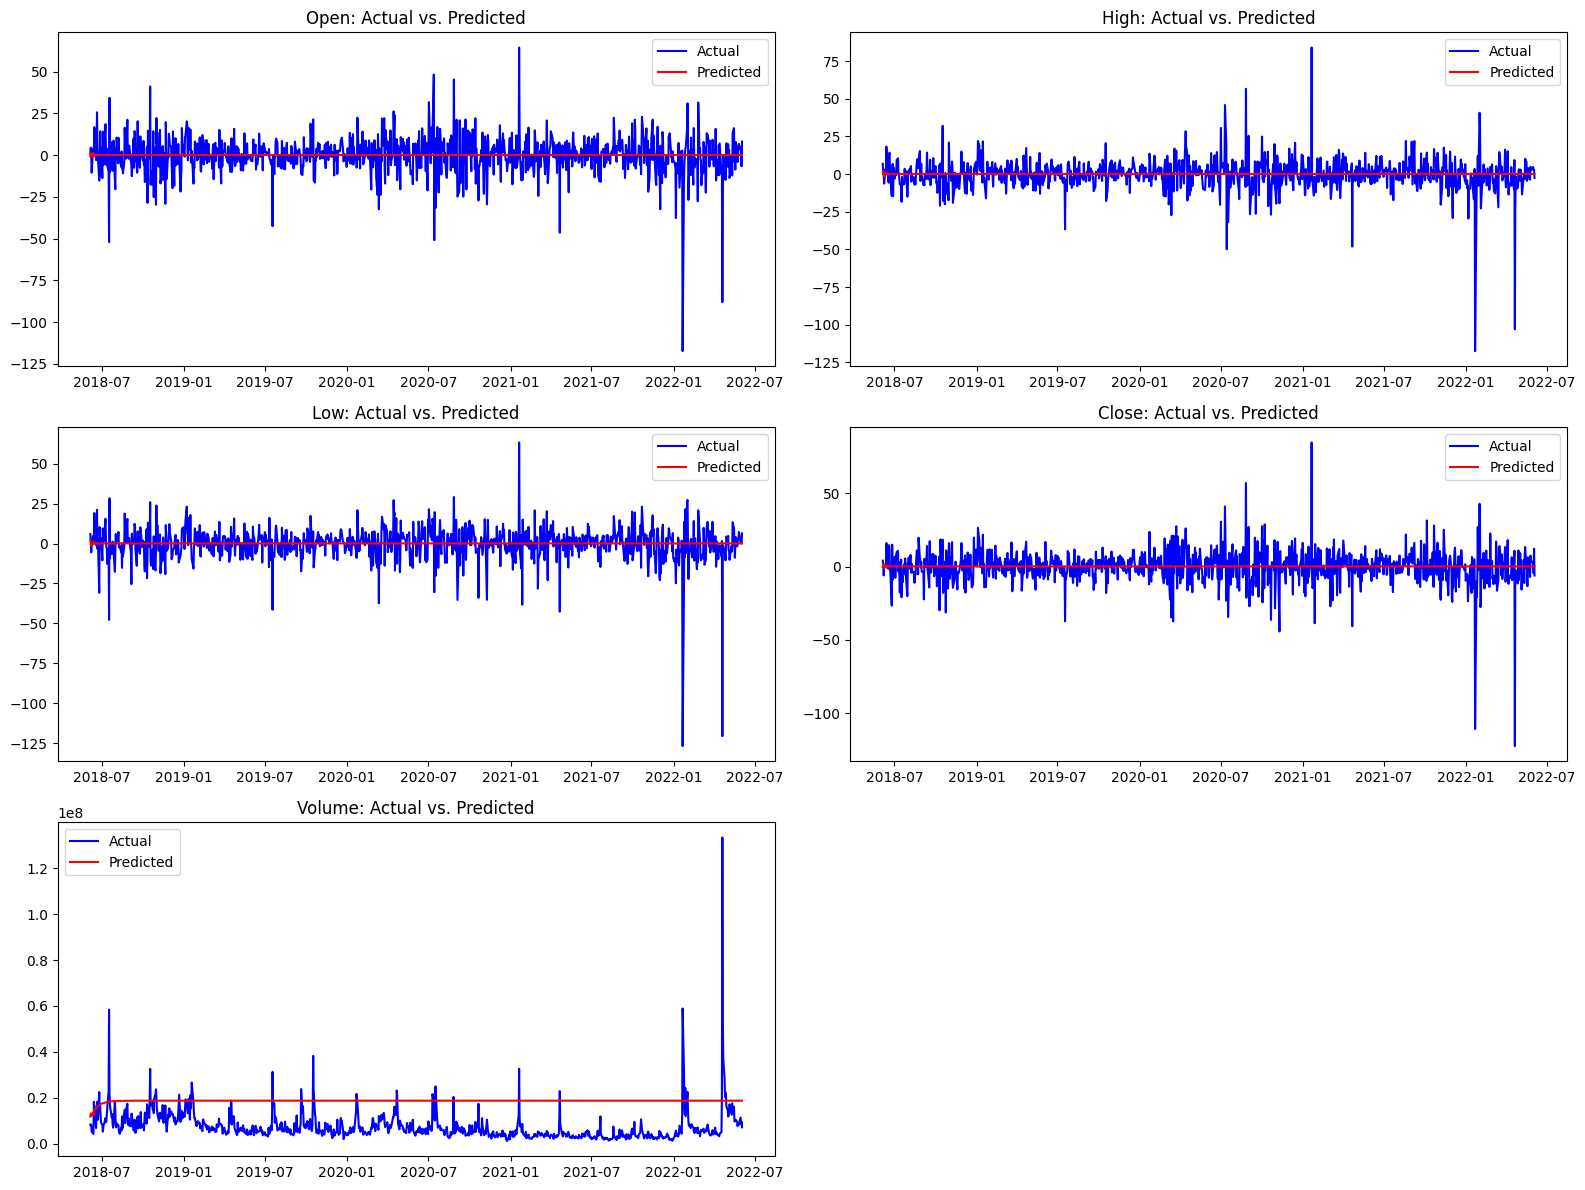

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Forecast using the trained VAR model
predictions = var_model_fit.forecast(train_data_final.values[-var_model_fit.k_ar:], steps=len(test_data))

# Reshape the predictions to (n_samples, n_features)
predictions_reshaped = predictions[:, :5] # Taking only the first 5 features

# Inverse transform the predictions and actual values
predictions_inverted = scaler.inverse_transform(predictions_reshaped)
actual_values_inverted = scaler.inverse_transform(test_data.values[:,:5]) # Taking only the first 5 features

# Calculate RMSE and MAE for each variable
rmse_values = {}
mae_values = {}
for i, col in enumerate(df_selected.columns):
    rmse_values[col] = np.sqrt(mean_squared_error(actual_values_inverted[:, i], predictions_inverted[:, i]))
    mae_values[col] = mean_absolute_error(actual_values_inverted[:, i], predictions_inverted[:, i])
    print(f"RMSE for {col}: {rmse_values[col]}")
    print(f"MAE for {col}: {mae_values[col]}")

# Calculate Overall RMSE and MAE
overall_rmse = np.sqrt(mean_squared_error(actual_values_inverted, predictions_inverted))
overall_mae = mean_absolute_error(actual_values_inverted, predictions_inverted)

print(f"Overall RMSE: {overall_rmse}")
print(f"Overall MAE: {overall_mae}")

# Visualize the results
plt.figure(figsize=(16, 12))
for i, col in enumerate(df_selected.columns):
    plt.subplot(3, 2, i + 1)
    plt.plot(test_data.index, actual_values_inverted[:, i], label='Actual', color='blue')
    plt.plot(test_data.index, predictions_inverted[:, i], label='Predicted', color='red')
    plt.title(f'{col}: Actual vs. Predicted')
    plt.legend()

plt.tight_layout()
plt.show()

## Data visualization

### Subtask:
Visualize the model's forecast against the actual values.


**Reasoning**:
Visualize the model's forecast against the actual values using the provided dataframes and the calculated evaluation metrics.



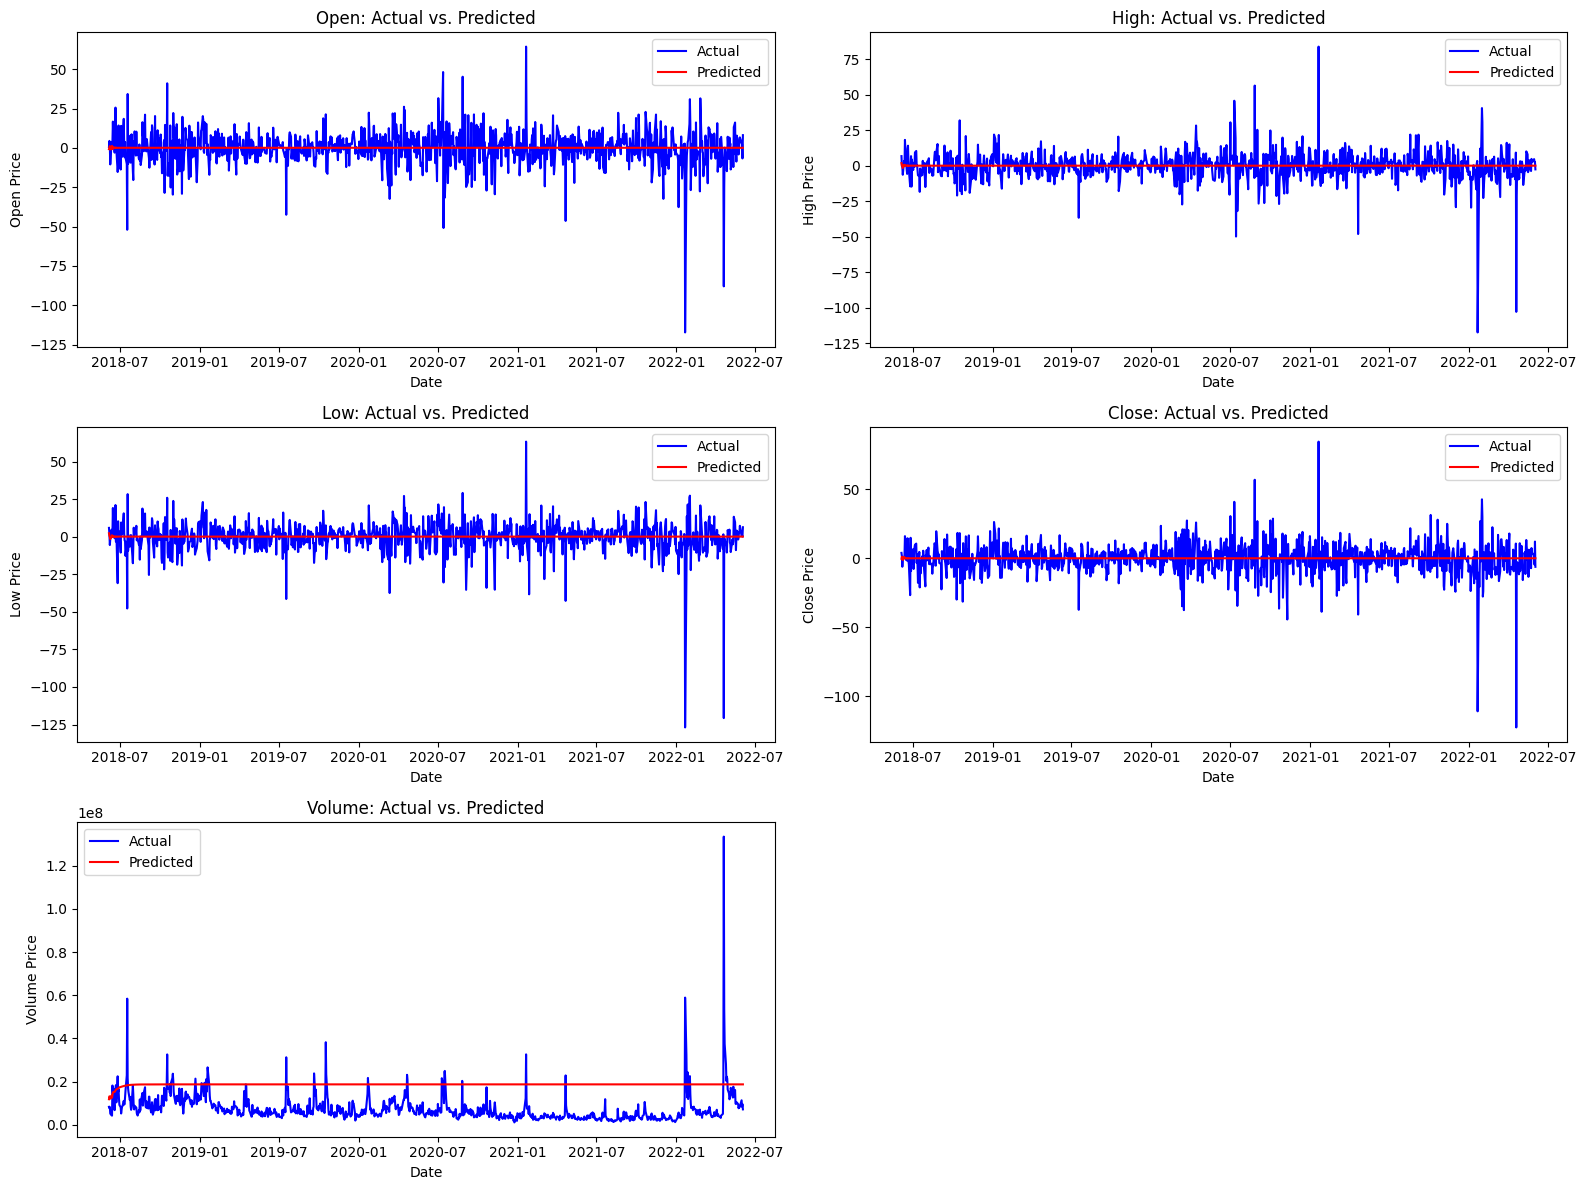

In [25]:
import matplotlib.pyplot as plt

# Assuming predictions_inverted and actual_values_inverted are already calculated
plt.figure(figsize=(16, 12))
for i, col in enumerate(df_selected.columns):
    plt.subplot(3, 2, i + 1)
    plt.plot(test_data.index, actual_values_inverted[:, i], label='Actual', color='blue')
    plt.plot(test_data.index, predictions_inverted[:, i], label='Predicted', color='red')
    plt.title(f'{col}: Actual vs. Predicted')
    plt.xlabel("Date")
    plt.ylabel(f"{col} Price")
    plt.legend()

plt.tight_layout()
plt.show()